In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['image.cmap'] = 'inferno'

def imshow(img, cmap=None):
    plt.title(img.shape)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
# from google.colab.patches import cv2_imshow

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 10000   # minArea may be adjusted to suit for your experiment
# blobParams.maxArea = 1000000   # maxArea may be adjusted to suit for your experiment
blobParams.maxArea = 100000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)


In [17]:
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
  for y in range(0, 4):
    objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)

In [ ]:
objpoints = None # 3d point in real world space
imgpoints = None # 2d points in image plane.
for f in range(3904,3923):
    print("data/IMG_%d.JPG" % f)
    img = cv2.imread("data/IMG_%d.JPG" % f)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #keypoints = blobDetector.detect(gray)
    #im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    ret, corners = cv2.findCirclesGrid(gray, (4, 11),
                        flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
                                     blobDetector = blobDetector)   # Find the circle grid
    #cv2_imshow(im_with_keypoints)
    #print(keypoints)
    if corners is not None and ret:
        objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
        imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
    else:
        print("Skip IMG-%02d.JPG" % f)


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)



data/IMG_3904.JPG


Initial, after


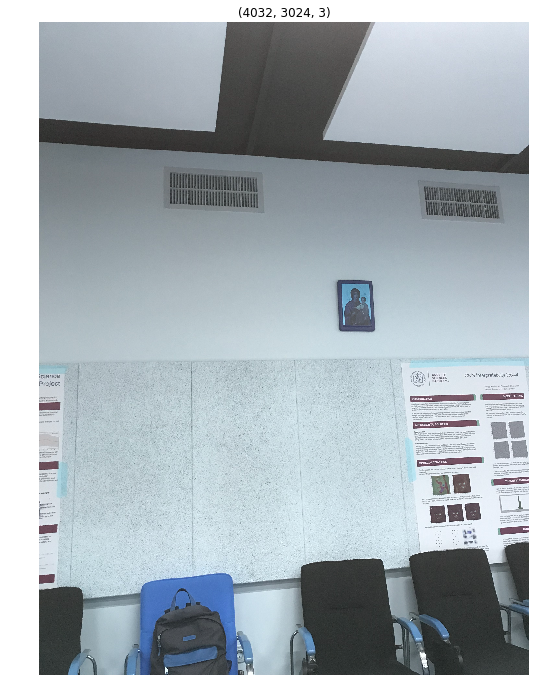

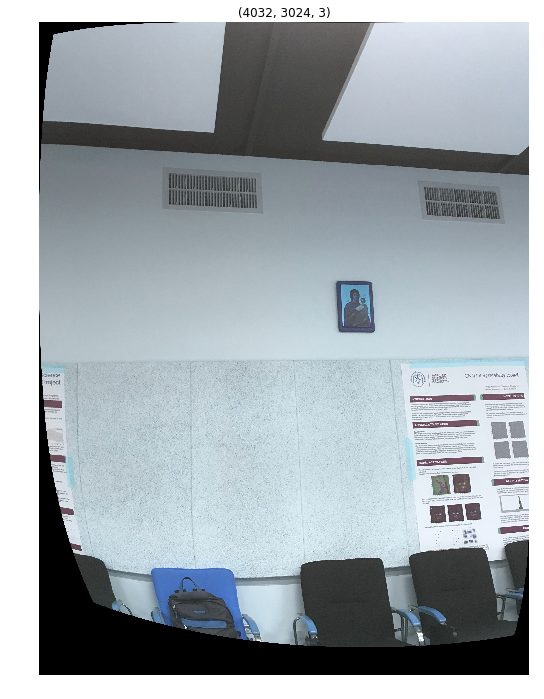

In [15]:
#dist = np.array([0,0,0,0,0])
test = cv2.imread("data/Test.JPG")
# print('Initial image')
# imshow(dst)
# plt.show()

(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
#mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
#dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
#x,y,w,h = roi
#dst = dst[y:y+h, x:x+w]
#dst = cv2.resize(dst, (0,0), fx=0.25, fy=0.25) 
# print('After')
# imshow(dst)

print("Initial, after")
# plt.subplot(121), 
imshow(test)
plt.show()
# plt.subplot(122), 
imshow(dst)
plt.show()